In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
archivo='data/BTC-USD.csv'

In [3]:
data=pd.read_csv(archivo)

In [4]:
p=14
p_str=str(p)

In [ ]:
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import pandas as pd
import matplotlib.dates as mpl_dates

# Extracting Data for plotting
ohlc = data.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'])
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)

# Creating Subplots
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(121)

# Formatting Date
date_format = mpl_dates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_format)

candlestick_ohlc(ax2, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)
ax.plot([ohlc['Date'][56], ohlc['Date'][55]],[20000,30000],color = 'g')

# fig.autofmt_xdate()

# fig.tight_layout()

plt.show()

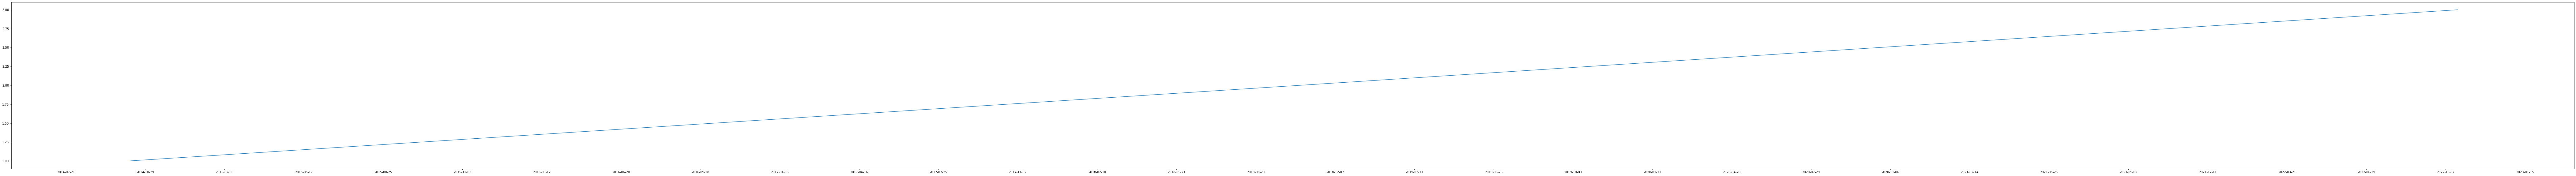

In [5]:
#EJE X CON FECHAS

from datetime import datetime as time
from matplotlib import pyplot as plt
from matplotlib import dates as mdates

intervalo=100

plt.figure(figsize=(150,10))

#X e Y tienen que tener la misma longitud, las fechas no se solaparán gracias al intervalo

dates = ['2014-10-07', '2018-10-22', '2022-10-22']#data['Date']
x_values = [time.strptime(d, "%Y-%m-%d").date() for d in dates]

y_values = [1, 2, 3] #por ejemplo: dm_df['+DI']

#Set format and locator, interval
ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator(interval=intervalo)
ax.xaxis.set_major_locator(locator)

#As many plots as data we want to plot, we need to specify x and y in each one
plt.plot(x_values, y_values)
# plt.plot(x_values, y_values)
# plt.plot(x_values, y_values)

plt.show()

In [6]:
display = None
pd.set_option('display.max_columns', display)
pd.set_option('display.max_rows', display)

In [7]:
def FuncionRMA(values,period): #FUNCIONA
    values=pd.Series(values)
    k=1/period
    result=pd.DataFrame()
    array=[]
    result['RMA']=values.rolling(window=period).mean()
    for i in range(len(values)):
        if(i>period-1):
            result['RMA'][i]=(k*values[i]) + ((1-k)* result['RMA'][i-1])
        else:    
            continue
    
    return np.array(result['RMA'])

def FuncionRMA2(values,periodo, adx): #FUNCIONA
    if (adx==False):
        long_data=periodo
    else:
        long_data=(periodo*2)-1
    
    values=pd.Series(values)
    k=1/periodo
    result=pd.DataFrame()
    array=[]
    array=np.array(values.iloc[:long_data].rolling(window=periodo).mean())
    for i in range(len(values)):
        if(i>=long_data):
            op=(k*values[i]) + ((1-k)* array[i-1])
            array = np.append(array,op)

        else:    
            continue
    result['RMA2']=pd.Series(array)

    return array

In [8]:
def FuncionEMA(values, period):
    values=pd.Series(values)
    result=pd.DataFrame()
    result['EMA'] = values.ewm(span=period, adjust=False).mean()
    
#     plt.figure(figsize=(20,10))
    
#     plt.plot(values, label='Valores de entrada', alpha=0.2)
#     plt.plot(result['EMA'], label='EMA')

#     plt.legend(loc='upper left')
#     plt.show()
    
    return result['EMA']

def MiFuncionEMA(values,period):

    k=2/(period+1)
    Nexts=pd.DataFrame()
    array=[]
     
    array = np.array(values.iloc[:period].rolling(window=period).mean().iloc[:period])
    for i in range(len(values)):
        if (i>period-1):
            array=np.append(array,(k*values[i]) + ((1-k)* array[i-1]))
        else:
            continue
    
    Nexts['EMA'] = pd.Series(array)
    plt.figure(figsize=(20,10))
    
    plt.plot(values, label='Valores de entrada', alpha=0.2)
    plt.plot(Nexts['EMA'], label='EMA')

    plt.legend(loc='upper left')
    plt.show()

In [9]:
def FuncionSMA(values, period): #FUNCIONA
    values=pd.Series(values)
    result=pd.DataFrame()
    result['SMA'] = values.rolling(window=period).mean()
    
#     plt.figure(figsize=(20,10))
    
#     plt.plot(values, label='Valores de entrada', alpha=0.2)
#     plt.plot(result['SMA'], label='SMA')

#     plt.legend(loc='upper left')
#     plt.show()
    
    return result['SMA']

In [10]:
# RMA(tr_df['tr'], 14)
# MiFuncionRMA(tr_df['tr'], 14)
# MiFuncionEMA(tr_df['tr'],14)
# FuncionEMA(tr_df['tr'],14)
# FuncionSMA(data['Close'], 50)

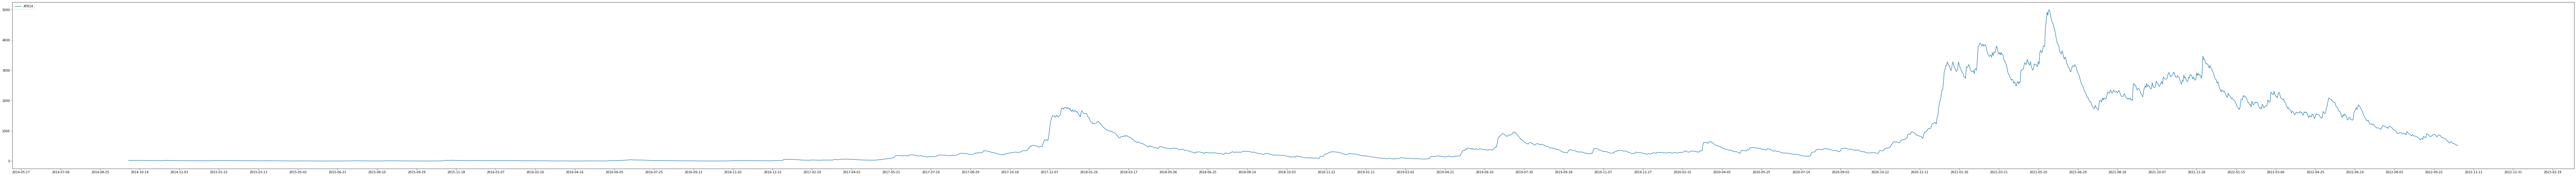

In [11]:
#ATR
#FuncionRMA2

data=pd.read_csv(archivo)

tr_df=pd.DataFrame()
tr_df['Date']=data['Date']

def Calc_TR(dt):
    A=[]
    B=[]
    C=[]
    TR=[]
    
    for i in range(len(dt)):
        uno=dt['High'][i]-dt['Low'][i]
        
        if(i>0):
            dos=np.abs(dt['High'][i]-dt['Close'][i-1])
            tres=np.abs(dt['Low'][i]-dt['Close'][i-1])

        else:
            dos=0
            tres=0
        
        A.append(uno)
        B.append(dos)
        C.append(tres)
        
        TR.append(np.amax([uno,dos,tres]))
    
    tr_df['uno'] = pd.Series(A)
    tr_df['dos'] = pd.Series(B)
    tr_df['tres'] = pd.Series(C)
    tr_df['tr'] = pd.Series(TR)
        
    return pd.Series(TR)

def Calc_ATR(dt,period):
    TR = Calc_TR(dt)
    
    ATR=FuncionRMA2(TR,period,False)
    
    #LETS PLOT!!
    
    plt.figure(figsize=(150,10))

    intervalo=50
    dates = data['Date']
    x_values = [time.strptime(d, "%Y-%m-%d").date() for d in dates]

    ax = plt.gca()
    formatter = mdates.DateFormatter("%Y-%m-%d")
    ax.xaxis.set_major_formatter(formatter)
    locator = mdates.DayLocator(interval=intervalo)
    ax.xaxis.set_major_locator(locator)

#     plt.plot(x_values, dt['Close'], label='Precio')
    plt.plot(x_values, ATR, label='ATR'+str(period))

    plt.legend(loc='upper left')
    plt.show()

    return ATR

tr_df['ATR14'] = pd.Series(Calc_ATR(data,14))


No handles with labels found to put in legend.


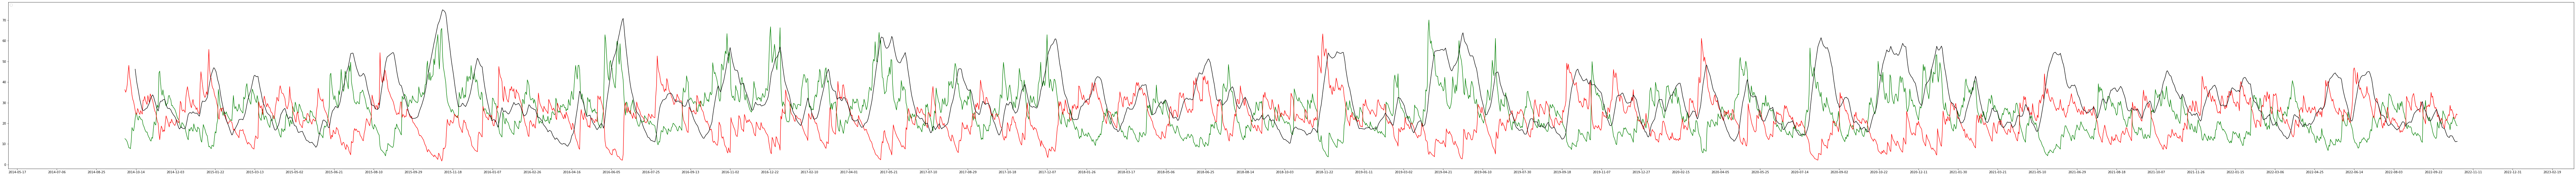

In [12]:
#ADX
#Ejecutar ATR antes
#FuncionRMA2

data=pd.read_csv(archivo)

dm_df = pd.DataFrame()
dm_df['Date']=data['Date']
tr_df = pd.DataFrame()
tr_df['Date']=data['Date']

def Calc_DMs(dt):
    PDM=[]
    NDM=[]
    
    for i in range(len(dt)):
    
        if(i>0):
            A=dt['High'][i]-dt['High'][i-1]
            B=dt['Low'][i-1]-dt['Low'][i]

            if(0<A>B):
                PDM.append(A)
                NDM.append(0)
            elif(0<B>A):
                NDM.append(B)
                PDM.append(0)    
            else:
                PDM.append(0)
                NDM.append(0)
        else:
            PDM.append(0)
            NDM.append(0)
        
    dm_df['+DM'] = pd.Series(PDM)
    dm_df['-DM'] = pd.Series(NDM)
    
    return PDM,NDM

def Calc_Exps(dt):
    PDM,NDM=Calc_DMs(dt)
    TR = Calc_TR(dt)
    
    EPDM=FuncionRMA2(PDM,p,False)
    ENDM=FuncionRMA2(NDM,p,False)
    ATR=FuncionRMA2(TR,p,False)
    
    tr_df['ATR14'] = pd.Series(ATR)
    
    dm_df['+DM14'] = pd.Series(EPDM)
    dm_df['-DM14'] = pd.Series(ENDM)
    
    return EPDM, ENDM, ATR

def Calc_DIs(dt):
    EPDM, ENDM, ATR = Calc_Exps(dt)
    
    PDI=(EPDM/ATR)*100
    NDI=(ENDM/ATR)*100
    
    dm_df['+DI'] = pd.Series(PDI)
    dm_df['-DI'] = pd.Series(NDI)  
    
    return PDI, NDI

def Calc_DXs(dt):
    PDI, NDI = Calc_DIs(dt)
    
    DX = 100*(np.abs(PDI-NDI)/np.abs(PDI+NDI))
    
    dm_df['DX'] = pd.Series(DX)
    
    return DX

def ADX(dt):
    DX = Calc_DXs(dt)
    ADX = FuncionRMA2(DX,p,True)
    
    return pd.Series(ADX)
    
dm_df['ADX']=ADX(data)

#LETS PLOT!!
    
plt.figure(figsize=(150,10))

intervalo=50
dates = data['Date']
x_values = [time.strptime(d, "%Y-%m-%d").date() for d in dates]

ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator(interval=intervalo)
ax.xaxis.set_major_locator(locator)

plt.plot(x_values, dm_df['+DI'], color='g')
plt.plot(x_values, dm_df['-DI'], color='r')

# plt.plot(x_values, dm_df['DX'], color='b', alpha=0.5)
plt.plot(x_values, dm_df['ADX'], color='k')

plt.legend(loc='upper left')
plt.show()

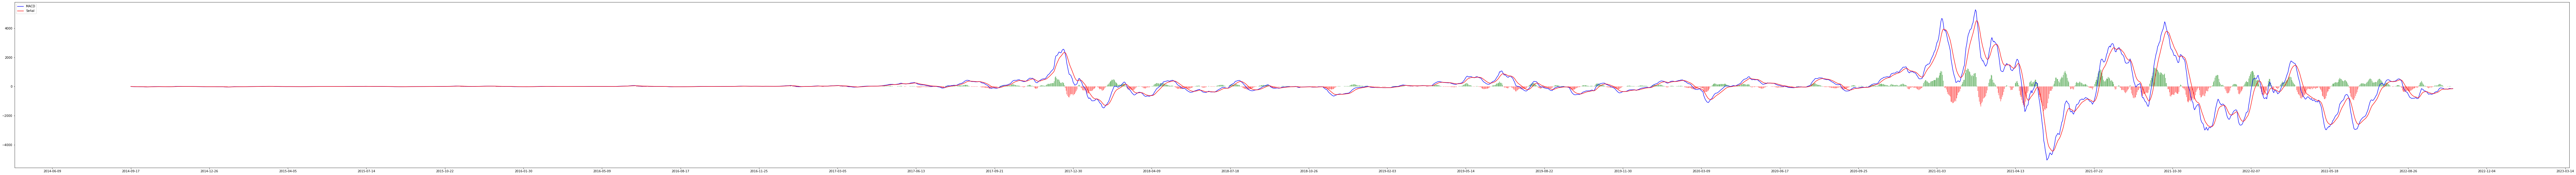

In [13]:
#MACD
#FuncionEMA
data=pd.read_csv(archivo)

macd_df=pd.DataFrame()
macd_df['Date']=data['Date']
def MACD(dt):
    
    periodo12= FuncionEMA(dt['Close'],12)
    periodo26= FuncionEMA(dt['Close'],26)
    
    MACD = np.array(periodo12)-np.array(periodo26)
    
    macd_df['MACD']=pd.Series(MACD)
    
    Señal=FuncionEMA(macd_df['MACD'],9)    
    macd_df['Señal']=Señal

    macd_df['Histograma'] = macd_df['MACD'] - macd_df['Señal']
    
    #PLOT!!
    intervalo=100
    formato="%Y-%m-%d"
    plt.figure(figsize=(150,10))
    
    dates=dt['Date']
    x_values=[time.strptime(d, formato).date() for d in dates]

    #Set format and locator, interval
    ax=plt.gca()
    formatter = mdates.DateFormatter(formato)
    ax.xaxis.set_major_formatter(formatter)
    locator=mdates.DayLocator(interval=intervalo)
    ax.xaxis.set_major_locator(locator=locator)
    
#     plt.plot(x_values, dt['Close'], label='Valores de entrada', alpha=0.2)
    plt.plot(x_values, MACD, label='MACD', color='b')
    plt.plot(x_values, Señal, label='Señal', color='r')
    
#     plt.bar(data['Date'], macd_df['Histograma'])

    y=macd_df['Histograma']
    
    mask1 = y < 0
    mask2 = y > 0

    plt.bar(data['Date'][mask1], y[mask1], color = 'red',alpha=0.5)
    plt.bar(data['Date'][mask2], y[mask2], color = 'green',alpha=0.5)

    plt.legend(loc='upper left')
    plt.show()
    
    
MACD(data)    

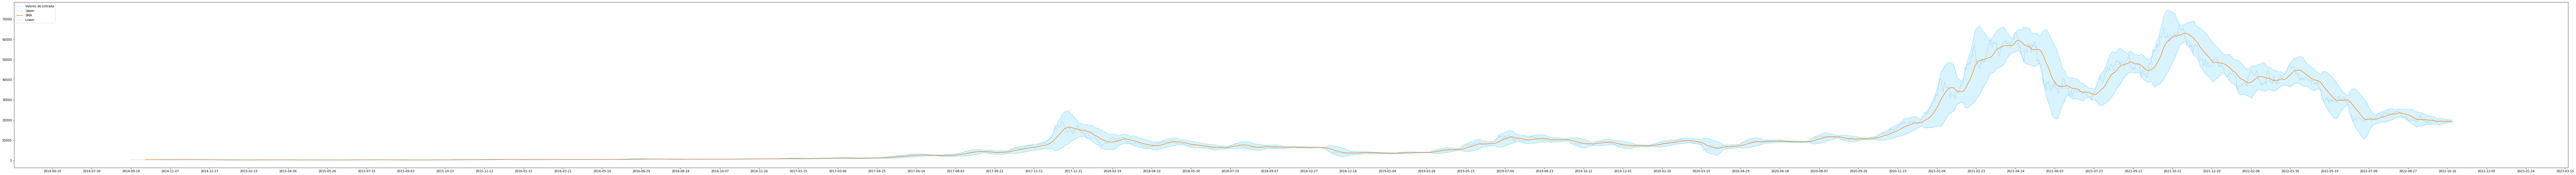

In [14]:
#Bollinger Bands
#FuncionSMA

data=pd.read_csv(archivo)

bbol_df = pd.DataFrame()
bbol_df['Date']=data['Date']    
days=20
def Calc_Bands(dt, bbol, d,k):
    result=pd.DataFrame()
    result['Date']=dt['Date']
    result['Close']=dt['Close']
    result['SMA']=FuncionSMA(data['Close'],d)
    result['Close_sma']=dt['Close']-result['SMA']    
    result['sqr']=result['Close_sma'].pow(2)
    result['sqr_sum']=result['sqr'].rolling(window=d).sum()
    result['sqr_mean']=result['sqr_sum']/(d)
    result['StdDev']=np.sqrt(result['sqr_mean'])
    
#     result['StdDev']=data['Close'].rolling(window=d).std()
 
    k_std=k * result['StdDev']
    
    bbol['StdDev']=result['StdDev']
    bbol['Upper_band']=result['SMA'] + k_std
    bbol['Middle_band']=result['SMA']
    bbol['Lower_band']=result['SMA'] - k_std
    
    
    plt.figure(figsize=(150,10))

    intervalo=50
    dates = dt['Date']
    x_values = [time.strptime(d, "%Y-%m-%d").date() for d in dates]

    ax = plt.gca()
    formatter = mdates.DateFormatter("%Y-%m-%d")
    ax.xaxis.set_major_formatter(formatter)
    locator = mdates.DayLocator(interval=intervalo)
    ax.xaxis.set_major_locator(locator)

    plt.plot(x_values,data['Close'], label='Valores de entrada', alpha=0.2)
    plt.plot(x_values,bbol_df['Upper_band'], label='Upper', color='#00b2ff42')
    plt.plot(x_values,bbol_df['Middle_band'], label='SMA', color='#FF7400')
    plt.plot(x_values,bbol_df['Lower_band'], label='Lower', color='#00b2ff42')
    
    plt.fill_between(x_values,bbol_df['Lower_band'],bbol_df['Upper_band'],color='#00b2ff42', alpha=0.15)
    
    plt.legend(loc='upper left')
    plt.show()


    return result
    
result= Calc_Bands(data, bbol_df, days, 2)

In [15]:
#Estrategias

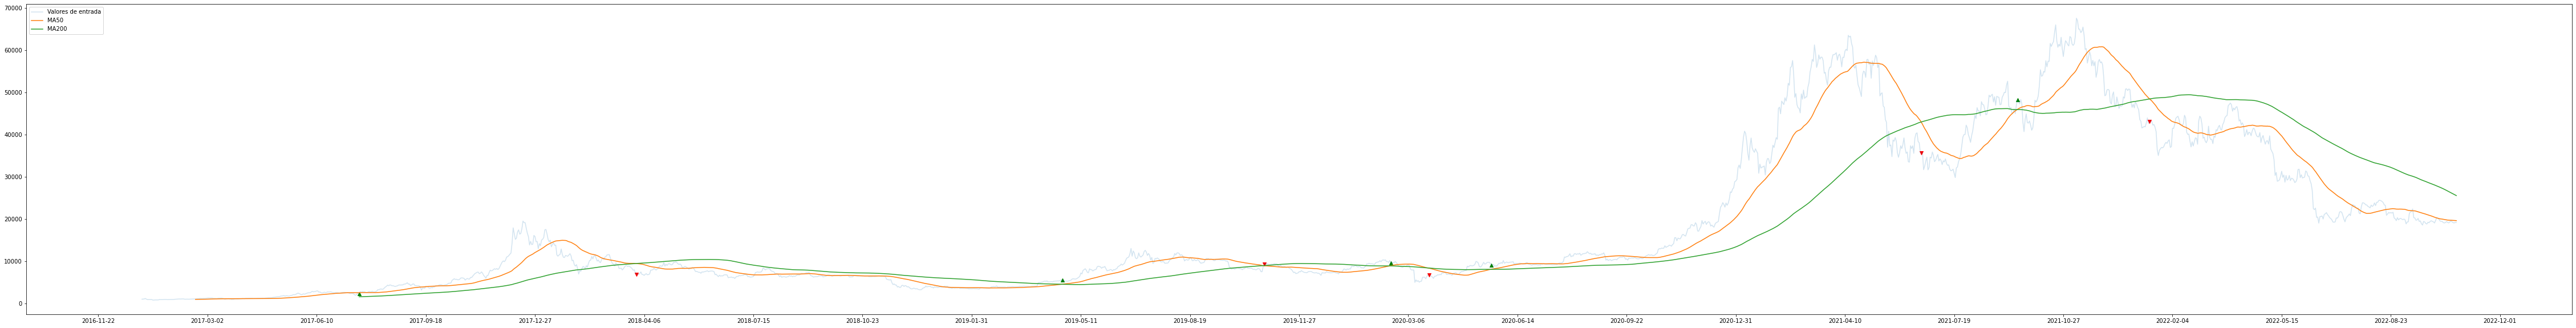

Numero de Compras:  5
Date
2017-07-19     2273.0
2019-04-24     5465.0
2020-02-19     9633.0
2020-05-21     9082.0
2021-09-15    48176.0
Name: Compra, dtype: float64 

Numero de Ventas:  5
Date
2018-03-30     6891.0
2019-10-26     9245.0
2020-03-25     6681.0
2021-06-19    35616.0
2022-01-14    43100.0
Name: Venta, dtype: float64 

Numero Total de Cruces:  10


In [16]:
#Cruces MA

data=pd.read_csv(archivo)
data=data[837:]
data=data.reset_index(drop=True)

precio=data['Close']
señales=pd.DataFrame()
señales['Date']=data['Date']
señales=señales.set_index('Date')

def Calc_Cruces(data_sma, ma1, ma2):
    MA50=FuncionSMA(data_sma,ma1)
    MA200=FuncionSMA(data_sma,ma2)

    compra=[]
    venta=[]
    posicion=0

    for i in range(len(data_sma)):

        if(posicion!=1 and MA50[i]>MA200[i]):
            compra.append(data_sma[i])
            venta.append(np.nan)
            posicion=1
        elif(posicion!=-1 and MA200[i]>MA50[i]):
            venta.append(data_sma[i])
            compra.append(np.nan)
            posicion=-1
        else:
            venta.append(np.nan)
            compra.append(np.nan)
            

    plt.figure(figsize=(80,10))

    formato='%Y-%m-%d'
    intervalo=100

    dates=data['Date']
    x_values = [time.strptime(d, formato).date() for d in dates]

    ax=plt.gca()
    formatter=mdates.DateFormatter(formato)
    ax.xaxis.set_major_formatter(formatter)
    locator=mdates.DayLocator(interval=intervalo)
    ax.xaxis.set_major_locator(locator)

    plt.plot(x_values,data_sma, label='Valores de entrada', alpha=0.2)
    plt.plot(x_values,MA50, label='MA50')
    plt.plot(x_values,MA200, label='MA200')
    plt.scatter(x_values,compra,marker='^', color='g')
    plt.scatter(x_values,venta,marker='v', color='r')


    plt.legend(loc='upper left')
    plt.show()
    
    return compra, venta

señales['Compra'], señales['Venta'] = pd.Series(Calc_Cruces(precio, 50,200))

def Imprimir_Data_Cruces_MA():

    real_señales_compra = señales['Compra'].dropna()
    real_señales_venta = señales['Venta'].dropna()

    num_compras = len(real_señales_compra)
    num_ventas = len(real_señales_venta)

    print('Numero de Compras: ', num_compras)
    print(round(real_señales_compra), '\n')

    print('Numero de Ventas: ', num_ventas)
    print(round(real_señales_venta), '\n')

    print('Numero Total de Cruces: ', num_compras+num_ventas)
    
Imprimir_Data_Cruces_MA()

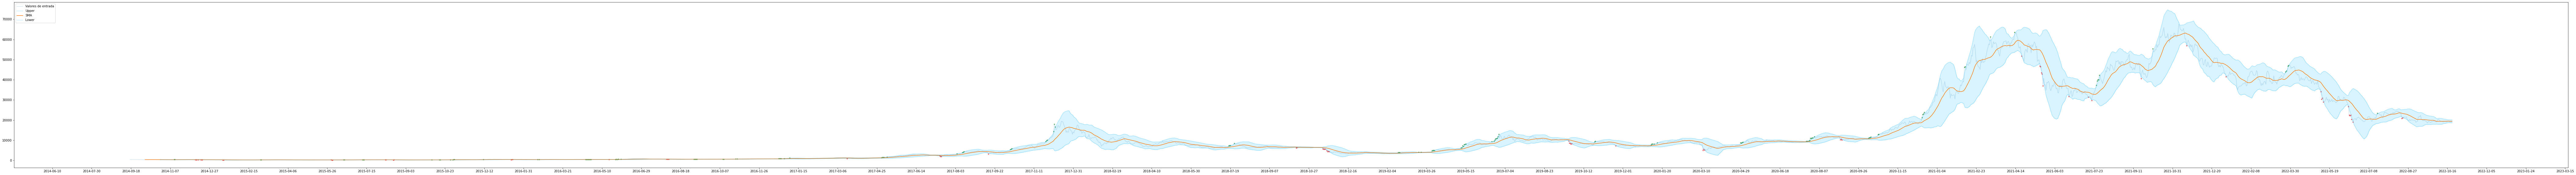

,% Total Fuera,% Top Fuera,% Bottom Fuera
0,7.234618,4.699121,2.535497


In [17]:
#Porcentaje Precio Fuera BBOL
#Ejecutar BBOL antes CON LA MISMA DATA
data=pd.read_csv(archivo)

precio=data['Close']
fecha=data['Date']

def Calc_Precios_Fuera():
    #Datos y arrays necesarios
    top=bbol_df['Upper_band']
    pasada_top=[]

    bottom=bbol_df['Lower_band']
    pasada_bottom=[]


    pasada_total=[]


    #Calculo
    for i in range(len(precio)):
        if (precio[i]>top[i]):
            pasada_total.append(precio[i])

        elif(precio[i]<bottom[i]):

            pasada_total.append(precio[i])

        else:
            pasada_total.append(np.nan)
        
    return pasada_total

def Data_Precios_Fuera():
    pasada_total=Calc_Precios_Fuera()
    
    #Datos y arrays necesarios

    middle=bbol_df['Middle_band']
    
    #Creacion DataFrame
    
    pasadas_df=pd.DataFrame()
    pasadas_df['Date']=fecha

    #Almacenar Resultado
    
    pasadas_df['Totales']=pd.Series(pasada_total)

    mask1 = pasada_total>middle #Devuelve una serie de true/false
    mask2 = pasada_total<middle

    pasadas_df['Top']=pd.Series(pasadas_df['Totales'][mask1])
    pasadas_df['Bottom']=pd.Series(pasadas_df['Totales'][mask2])

    pasadas_df=pasadas_df.set_index('Date')
    pasadas_df=pasadas_df.dropna(how='all')
    
    return pasadas_df

def Graficar_BBOL_Precios_Fuera():
    
    pasadas_df=Data_Precios_Fuera()
    
    #LETS PLOT!
    plt.figure(figsize=(150,10))

    intervalo=50
    dates = data['Date']
    x_values = [time.strptime(d, "%Y-%m-%d").date() for d in dates]

    ax = plt.gca()
    formatter = mdates.DateFormatter("%Y-%m-%d")
    ax.xaxis.set_major_formatter(formatter)
    locator = mdates.DayLocator(interval=intervalo)
    ax.xaxis.set_major_locator(locator)

    plt.plot(x_values,data['Close'], label='Valores de entrada', alpha=0.2)
    plt.plot(x_values,bbol_df['Upper_band'], label='Upper', color='#00b2ff42')
    plt.plot(x_values,bbol_df['Middle_band'], label='SMA', color='#FF7400')
    plt.plot(x_values,bbol_df['Lower_band'], label='Lower', color='#00b2ff42')

    plt.scatter(pasadas_df.index,pasadas_df['Top'],marker='.',color='g',alpha=0.5) #No se puede usar x_values porque es un array entonces no puede comparar el dataframe de trues y falses que devuelve la mask, sin embargo el data['Dates'] si puede compararlos y decir que si el valor correspondiente a esa fecha, segun la mask, es false, no se pone
    plt.scatter(pasadas_df.index,pasadas_df['Bottom'],marker='.',color='r',alpha=0.5)

    plt.fill_between(x_values,bbol_df['Lower_band'],bbol_df['Upper_band'],color='#00b2ff42', alpha=0.15)

    plt.legend(loc='upper left')
    plt.show()
    
def Calcular_Porcentaje(dato1, dato2):
    num1=len(dato1)
    num2=len(dato2)
    
    resultado = pd.Series(num1/num2*100)
    return resultado
    
def Imprimir_Data_Porcentajes_BBOL():
    
    pasadas_df=Data_Precios_Fuera()
    
    porcentajes_df=pd.DataFrame()

    porcentajes_df['% Total Fuera'] = Calcular_Porcentaje(pasadas_df['Totales'], precio)
    porcentajes_df['% Top Fuera'] = Calcular_Porcentaje(pasadas_df['Top'].dropna(), precio)
    porcentajes_df['% Bottom Fuera'] = Calcular_Porcentaje(pasadas_df['Bottom'].dropna(), precio)

    return porcentajes_df


Graficar_BBOL_Precios_Fuera()
# print('Porcentajes:')
Imprimir_Data_Porcentajes_BBOL() #Formato DataFrame solo se puede imprimir uno
# print('Precios:')
# print(Data_Precios_Fuera()) #Formato DataFrame solo se puede imprimir uno

In [18]:
Data_Precios_Fuera()

,Totales,Top,Bottom
Date,,,
2014-11-12,423.561005,423.561005,NaN
2014-11-13,420.734985,420.734985,NaN
2014-12-09,352.218994,NaN,352.218994
2014-12-10,346.364990,NaN,346.364990
2014-12-11,350.506012,NaN,350.506012
2014-12-13,347.376007,NaN,347.376007
2014-12-16,327.062012,NaN,327.062012
2014-12-17,319.776001,NaN,319.776001
2014-12-18,311.395996,NaN,311.395996


Imposible pana, no puedo más, no tengo datos :(
